## Exploratório

In [5]:
import pandas as pd
import gzip
import re


In [2]:
filename = "v1.0-simplified_simplified-nq-train.jsonl.gz"

with gzip.open(filename, "rt") as f:
    n_lines = sum(1 for _ in f)

print("Total de linhas:", n_lines)

Total de linhas: 307373


In [3]:
df = pd.read_json(
    "v1.0-simplified_simplified-nq-train.jsonl.gz",
    lines=True,
    compression="gzip",
    nrows=5  # lê só as primeiras 5 mil linhas
)

In [4]:
df.columns

Index(['document_text', 'long_answer_candidates', 'question_text',
       'annotations', 'document_url', 'example_id'],
      dtype='object')

In [14]:
df.head()

,document_text,long_answer_candidates,question_text,annotations,document_url,example_id
0,Email marketing - Wikipedia <H1> Email marketi...,"[{'start_token': 14, 'top_level': True, 'end_t...",which is the most common use of opt-in e-mail ...,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Em...,5655493461695504401
1,The Mother ( How I Met Your Mother ) - wikiped...,"[{'start_token': 28, 'top_level': True, 'end_t...",how i.met your mother who is the mother,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Th...,5328212470870865242
2,Human fertilization - wikipedia <H1> Human fer...,"[{'start_token': 14, 'top_level': True, 'end_t...",what type of fertilisation takes place in humans,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Hu...,4435104480114867852
3,List of National Football League career quarte...,"[{'start_token': 28, 'top_level': True, 'end_t...",who had the most wins in the nfl,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Li...,5289242154789678439
4,Roanoke Colony - wikipedia <H1> Roanoke Colony...,"[{'start_token': 32, 'top_level': True, 'end_t...",what happened to the lost settlement of roanoke,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Ro...,5489863933082811018


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   document_text           5 non-null      object
 1   long_answer_candidates  5 non-null      object
 2   question_text           5 non-null      object
 3   annotations             5 non-null      object
 4   document_url            5 non-null      object
 5   example_id              5 non-null      int64 
dtypes: int64(1), object(5)
memory usage: 368.0+ bytes


In [46]:
df.iloc[0,3]

[{'yes_no_answer': 'NONE',
  'long_answer': {'start_token': 1952,
   'candidate_index': 54,
   'end_token': 2019},
  'short_answers': [{'start_token': 1960, 'end_token': 1969}],
  'annotation_id': 593165450220027640}]

In [24]:
df.iloc[0,0]

"Email marketing - Wikipedia <H1> Email marketing </H1> Jump to : navigation , search <Table> <Tr> <Td> </Td> <Td> ( hide ) This article has multiple issues . Please help improve it or discuss these issues on the talk page . ( Learn how and when to remove these template messages ) <Table> <Tr> <Td> </Td> <Td> This article needs additional citations for verification . Please help improve this article by adding citations to reliable sources . Unsourced material may be challenged and removed . ( September 2014 ) ( Learn how and when to remove this template message ) </Td> </Tr> </Table> <Table> <Tr> <Td> </Td> <Td> This article possibly contains original research . Please improve it by verifying the claims made and adding inline citations . Statements consisting only of original research should be removed . ( January 2015 ) ( Learn how and when to remove this template message ) </Td> </Tr> </Table> ( Learn how and when to remove this template message ) </Td> </Tr> </Table> <Table> <Tr> <T

In [27]:
filtro = df["document_text"].str.contains("brazil", case=False, na=False)
df_filtrado = df[filtro]

In [28]:
df_filtrado.head()

,document_text,long_answer_candidates,question_text,annotations,document_url,example_id
0,Email marketing - Wikipedia <H1> Email marketi...,"[{'start_token': 14, 'top_level': True, 'end_t...",which is the most common use of opt-in e-mail ...,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Em...,5655493461695504401


In [61]:
df_filtrado.iloc[0,2]

'which is the most common use of opt-in e-mail marketing'

In [42]:
row = df_filtrado.iloc[0]
tokens = row["document_text"].split(" ")

candidate = row["long_answer_candidates"][0] 
trecho_candidate = " ".join(tokens[candidate["start_token"]:candidate["end_token"]])
print(trecho_candidate)

<Table> <Tr> <Td> </Td> <Td> ( hide ) This article has multiple issues . Please help improve it or discuss these issues on the talk page . ( Learn how and when to remove these template messages ) <Table> <Tr> <Td> </Td> <Td> This article needs additional citations for verification . Please help improve this article by adding citations to reliable sources . Unsourced material may be challenged and removed . ( September 2014 ) ( Learn how and when to remove this template message ) </Td> </Tr> </Table> <Table> <Tr> <Td> </Td> <Td> This article possibly contains original research . Please improve it by verifying the claims made and adding inline citations . Statements consisting only of original research should be removed . ( January 2015 ) ( Learn how and when to remove this template message ) </Td> </Tr> </Table> ( Learn how and when to remove this template message ) </Td> </Tr> </Table>


In [58]:
row = df_filtrado.iloc[0]
ann = row["annotations"][0]
long_ans = ann["long_answer"]

tokens = row["document_text"].split(" ")
trecho_long = " ".join(tokens[long_ans["start_token"]:long_ans["end_token"]])

print(trecho_long)

<P> A common example of permission marketing is a newsletter sent to an advertising firm 's customers . Such newsletters inform customers of upcoming events or promotions , or new products . In this type of advertising , a company that wants to send a newsletter to their customers may ask them at the point of purchase if they would like to receive the newsletter . </P>


In [65]:
short_answer = ann["short_answers"][0]
short = " ".join(tokens[short_answer["start_token"]:short_answer["end_token"]])

print(short)

a newsletter sent to an advertising firm 's customers


## Contagem - Dataset Real

In [3]:
import pandas as pd
import gzip

In [11]:
import gzip
import json
import pandas as pd

file_path = "v1.0/train/nq-train-00.jsonl.gz"

titles = []
with gzip.open(file_path, "rt", encoding="utf-8") as f:
    for i, line in enumerate(f):
        obj = json.loads(line)
        titles.append(obj.get("document_title"))

df = pd.DataFrame(titles, columns=["document_title"])
print(df)

                                       document_title
0                         The Walking Dead (season 8)
1                                          Persephone
2                                    Colony (biology)
3              The Man in the High Castle (TV series)
4                   List of heads of state of Nigeria
...                                               ...
5956                                  Gregorian chant
5957  List of Xbox 360 games compatible with Xbox One
5958                               Taxonomy (biology)
5959                          Equal Protection Clause
5960                               King James Version

[5961 rows x 1 columns]


,document_title
0,The Walking Dead (season 8)
1,Persephone
2,Colony (biology)
3,The Man in the High Castle (TV series)
4,List of heads of state of Nigeria
...,...
5956,Gregorian chant
5957,List of Xbox 360 games compatible with Xbox One
5958,Taxonomy (biology)
5959,Equal Protection Clause


In [1]:
import polars as pl

In [ ]:
caminho_do_arquivo = "v1.0/train/nq-train-00.jsonl.gz"

q_lazy = pl.scan_ndjson(caminho_do_arquivo)

q_selecionado = q_lazy.select("document_title")
df_polars = q_selecionado.collect()

In [ ]:
contagem_titulos = df_polars["document_title"].value_counts()

print(contagem_titulos)

titulos_repetidos = contagem_titulos.filter(pl.col("count") > 1)

print(titulos_repetidos)

numero_de_titulos_que_repetem = titulos_repetidos.height

Contagem de cada título (os mais frequentes primeiro):
shape: (5_455, 2)
┌─────────────────────────────────┬───────┐
│ document_title                  ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ Noli Me Tángere (novel)         ┆ 1     │
│ Peyton Place (TV series)        ┆ 1     │
│ Getting Over It with Bennett F… ┆ 1     │
│ Timeline of the Spanish–Americ… ┆ 1     │
│ Ghost Whisperer (season 4)      ┆ 1     │
│ …                               ┆ …     │
│ Andy Goldsworthy                ┆ 1     │
│ Madras State                    ┆ 1     │
│ List of songs recorded by Quee… ┆ 1     │
│ The One with All the Thanksgiv… ┆ 1     │
│ List of backward compatible ga… ┆ 7     │
└─────────────────────────────────┴───────┘

Apenas os títulos que se repetem e suas contagens:
shape: (411, 2)
┌─────────────────────────────────┬───────┐
│ document_title                  ┆ count │
│ ---                  

In [23]:
total_de_linhas_duplicadas = df_polars["document_title"].is_duplicated().sum()

print(f"O número total de entradas duplicadas (excluindo a primeira ocorrência de cada) é: {total_de_linhas_duplicadas}")

O número total de entradas duplicadas (excluindo a primeira ocorrência de cada) é: 917


In [2]:
import polars as pl

caminho_do_arquivo = "v1.0/train/nq-train-00.jsonl.gz"

# 1. Crie o plano "lazy" para escanear o arquivo
lazy_df = pl.scan_ndjson(caminho_do_arquivo)

# 2. Use .select() para aplicar as expressões de agregação global.
#    No modo lazy, .select() pode ser usado para calcular agregações
#    em todo o DataFrame, não apenas para selecionar colunas existentes.
plano_de_contagem = lazy_df.select(
    # Para o total, contamos todas as linhas.
    pl.count().alias("registros_totais"),

    # Para os únicos, contamos os valores distintos na coluna específica.
    pl.col("document_title").n_unique().alias("registros_unicos")
)

# 3. Execute o plano e colete o resultado. Isso irá ler o arquivo uma única vez.
resultado_final = plano_de_contagem.collect()

print("DataFrame com os resultados da contagem:")
print(resultado_final)

# 4. Extraia os valores do DataFrame para exibi-los no formato desejado
total_registros = resultado_final.get_column("registros_totais")[0]
registros_unicos = resultado_final.get_column("registros_unicos")[0]

print("\n--- Resumo ---")
print(f"{total_registros} registros totais")
print(f"{registros_unicos} registros únicos (removendo os repetidos)")

C:\Users\ander\AppData\Local\Temp\ipykernel_17284\2041413153.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("registros_totais"),


DataFrame com os resultados da contagem:
shape: (1, 2)
┌──────────────────┬──────────────────┐
│ registros_totais ┆ registros_unicos │
│ ---              ┆ ---              │
│ u32              ┆ u32              │
╞══════════════════╪══════════════════╡
│ 5961             ┆ 5455             │
└──────────────────┴──────────────────┘

--- Resumo ---
5961 registros totais
5455 registros únicos (removendo os repetidos)


In [ ]:
import polars as pl
import os 

# caminho para a pasta que contém os arquivos
caminho_da_pasta = "v1.0/train/"

# Crie o padrão glob para corresponder a todos os seus arquivos
padrao_glob = os.path.join(caminho_da_pasta, "nq-train-*.jsonl.gz")

print(f"Usando o padrão glob para encontrar arquivos: {padrao_glob}")

#Escaneie TODOS os arquivos de uma vez de forma "lazy".
lazy_df_completo = pl.scan_ndjson(padrao_glob)
print("scan_ndjson concluido.")

plano_de_contagem_total = lazy_df_completo.select(
    pl.len().alias("registros_totais"),
    pl.col("document_title").n_unique().alias("registros_unicos")
)
print("Plano de contagem total criado.")
resultado_final_completo = plano_de_contagem_total.collect()

print("\nDataFrame com os resultados da contagem de todos os arquivos:")
print(resultado_final_completo)

# 4. Extraia e exiba os valores finais
total_registros = resultado_final_completo.get_column("registros_totais")[0]
registros_unicos = resultado_final_completo.get_column("registros_unicos")[0]

print("\n--- Resumo (Todos os 50 arquivos) ---")
print(f"{total_registros} registros totais")
print(f"{registros_unicos} registros únicos (removendo os repetidos)")

## Explorando CSV resumido

In [ ]:
import polars as pl

caminho = "csv/nq-train-*.csv"
lazy_df = pl.scan_csv(caminho)
df = lazy_df.head(5).collect()
print(df)
print(lazy_df.collect_schema())

stats = lazy_df.describe()
print(stats)

shape: (5, 4)
┌────────────────────────┬────────────────────────┬────────────────────────┬───────────────────────┐
│ document_title         ┆ document_url           ┆ refs                   ┆ title_encode          │
│ ---                    ┆ ---                    ┆ ---                    ┆ ---                   │
│ str                    ┆ str                    ┆ str                    ┆ str                   │
╞════════════════════════╪════════════════════════╪════════════════════════╪═══════════════════════╡
│ The Walking Dead       ┆ https://en.wikipedia.o ┆ ['Andrew_Lincoln',     ┆ The_Walking_Dead_(sea │
│ (season 8)             ┆ rg//w/in…              ┆ 'Norman_Ree…           ┆ son_8)                │
│ Persephone             ┆ https://en.wikipedia.o ┆ ['Persephone_(disambig ┆ Persephone            │
│                        ┆ rg//w/in…              ┆ uation)'…              ┆                       │
│ Colony (biology)       ┆ https://en.wikipedia.o ┆ ['Biology',            ┆ 

C:\Users\ander\AppData\Local\Temp\ipykernel_20892\2074006237.py:21: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  total_linhas = lazy_df.select(pl.count()).collect()


shape: (1, 1)
┌────────┐
│ count  │
│ ---    │
│ u32    │
╞════════╡
│ 307373 │
└────────┘


In [7]:
# total de registros (com repetidos)
total = lazy_df.select(pl.count()).collect()[0,0]

# total de registros distintos no title_encode
total_unicos = lazy_df.select(pl.col("title_encode").n_unique()).collect()[0,0]

print(f"Total de registros: {total}")
print(f"Total distintos em title_encode: {total_unicos}")

C:\Users\ander\AppData\Local\Temp\ipykernel_20892\330334103.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  total = lazy_df.select(pl.count()).collect()[0,0]


Total de registros: 307373
Total distintos em title_encode: 108071


In [16]:
# Converter string para lista e calcular métricas
resultado_refs = lazy_df.select(
	pl.col("refs").str.strip_chars("[]").str.split(",").alias("refs_list")
).with_columns(
	pl.col("refs_list").list.len().alias("num_itens"),
	pl.col("refs_list").list.unique().list.len().alias("num_unicos")
).with_columns(
	# percentual de repetidos: (total - únicos) / total * 100
	((pl.col("num_itens") - pl.col("num_unicos")) / pl.col("num_itens") * 100).alias("perc_repetidos")
).select(
	pl.col("num_itens").mean().alias("media_itens"),
	pl.col("num_unicos").mean().alias("media_unicos"),
	pl.col("perc_repetidos").mean().alias("media_perc_repetidos")
).collect()

print(resultado_refs)

shape: (1, 3)
┌─────────────┬──────────────┬──────────────────────┐
│ media_itens ┆ media_unicos ┆ media_perc_repetidos │
│ ---         ┆ ---          ┆ ---                  │
│ f64         ┆ f64          ┆ f64                  │
╞═════════════╪══════════════╪══════════════════════╡
│ 433.885517  ┆ 300.780765   ┆ 24.976251            │
└─────────────┴──────────────┴──────────────────────┘


In [35]:
lazy_df = pl.scan_csv(caminho)
df = lazy_df.select(pl.col("title_encode")).collect()

titulos_csv = set(df['title_encode'].to_list())

## Explorando o Neo4J

In [1]:
from neo4j import GraphDatabase

In [2]:
driver = GraphDatabase.driver("bolt://neo.andersonlbsoares.com.br:7687", auth=("neo4j", "your_password"))

In [ ]:
driver = GraphDatabase.driver("bolt://neo.andersonlbsoares.com.br:7687", auth=("neo4j", "your_password"))

with driver.session(database="anderson") as session:
    # Pega todos os titles do Neo4j
    results = session.run("MATCH (n) RETURN n.title_encode AS title")
    titulos_neo4j = set([record["title"] for record in results if record["title"] is not None])

# Encontra títulos extras
extras = titulos_neo4j - titulos_csv
print(f"Nós extras: {len(extras)}")
print(extras)

In [3]:
from neo4j import GraphDatabase
import pandas as pd

def run_query(query, params=None):
    with driver.session(database='anderson') as session:
        result = session.run(query, params or {})
        return [record.data() for record in result]

In [4]:
# 1. Grau (in, out, total)
degree_query = """
MATCH (n:Document)
OPTIONAL MATCH (n)<-[r:CITES]-()
WITH n, COUNT(r) AS in_degree
OPTIONAL MATCH (n)-[s:CITES]->()
WITH n, in_degree, COUNT(s) AS out_degree
RETURN n.title_encode AS document,
       in_degree,
       out_degree,
       in_degree + out_degree AS total_degree
ORDER BY in_degree DESC
"""
degree = run_query(degree_query)
df_degree = pd.DataFrame(degree)
driver.close()
print("=== Grau ===")
print(df_degree.head())
print(f"Grau médio total: {df_degree['total_degree'].mean()}")
print(f"Grau médio in: {df_degree['in_degree'].mean()}")


=== Grau ===
                             document  in_degree  out_degree  total_degree
0  International_Standard_Book_Number      46388          65         46453
1                           Main_Page      46163          23         46186
2                       United_States      18735        1394         20129
3           Digital_object_identifier      15092          35         15127
4                                IMDb      14851          40         14891
Grau médio total: 94.80772825272275
Grau médio in: 47.40386412636138


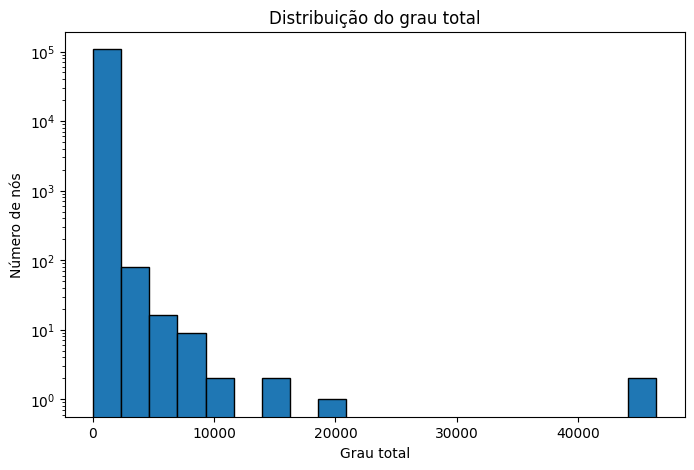

In [23]:
import matplotlib.pyplot as plt

# Histograma do grau total
plt.figure(figsize=(8,5))
plt.hist(df_degree["total_degree"], bins=20, edgecolor="black")
plt.xlabel("Grau total")
plt.ylabel("Número de nós")
plt.title("Distribuição do grau total")
plt.yscale("log")  # opcional: escala logarítmica no eixo Y (melhora visualização em grafos)
plt.show()

In [19]:
df_degree
# Ordena pela soma dos graus
df_degree = df_degree.sort_values(by="total_degree", ascending=False)
df_degree.head(10)

,document,in_degree,out_degree,total_degree
0,International_Standard_Book_Number,46388,65,46453
1,Main_Page,46163,23,46186
2,United_States,18735,1394,20129
3,Digital_object_identifier,15092,35,15127
4,IMDb,14851,40,14891
6,United_Kingdom,10077,829,10906
5,Library_of_Congress_Control_Number,10507,0,10507
7,The_New_York_Times,8936,179,9115
10,India,7534,791,8325
11,New_York_City,7271,804,8075


In [13]:
print(f"Grau médio total: {df_degree['total_degree'].mean()}")
print(f"Grau médio in: {df_degree['out_degree'].mean()}")

Grau médio total: 94.80772825272275
Grau médio in: 47.40386412636138


In [15]:
# 2. Clustering coefficient (aproximação)
clustering_query = """
MATCH (n:Document)
OPTIONAL MATCH (n)-[:CITES]->(m)-[:CITES]->(o)-[:CITES]->(n)
WITH n, COUNT(DISTINCT o) AS triangles
OPTIONAL MATCH (n)-[:CITES]->(m)
WITH n, triangles, COUNT(DISTINCT m) AS neighbors
RETURN n.title_encode AS document,
       CASE WHEN neighbors < 2 THEN 0
            ELSE (triangles*1.0)/(neighbors*(neighbors-1)) END AS clustering
ORDER BY clustering DESC
"""
clustering = run_query(clustering_query)
df_clustering = pd.DataFrame(clustering)
driver.close()
print("\n=== Clustering ===")
print(df_clustering.head())
print(f"Grau médio total: {df_degree['total_degree'].mean()}")

C:\Users\ander\AppData\Local\Temp\ipykernel_23460\19741009.py:5: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database='anderson') as session:



=== Clustering ===
                        document  clustering
0  Code-division_multiple_access        24.0
1               Pir_Panjal_Range        17.0
2                  Prophecy_Girl        15.5
3   Eurovision_Song_Contest_1956        15.0
4   When_the_River_Meets_the_Sea        13.5
Grau médio total: 94.80772825272275


In [16]:
# 3. Hubs e Authorities simplificados
# HubScore ~ out_degree, AuthorityScore ~ in_degree
hub_auth_query = """
MATCH (n:Document)
OPTIONAL MATCH (n)<-[r:CITES]-()
WITH n, COUNT(r) AS authority
OPTIONAL MATCH (n)-[s:CITES]->()
WITH n, authority, COUNT(s) AS hub
RETURN n.title_encode AS document, hub, authority
ORDER BY authority DESC
"""
hub_auth = run_query(hub_auth_query)
df_hub_auth = pd.DataFrame(hub_auth)
driver.close()
print("\n=== Hubs & Authorities ===")
print(df_hub_auth.head())

C:\Users\ander\AppData\Local\Temp\ipykernel_23460\19741009.py:5: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database='anderson') as session:



=== Hubs & Authorities ===
                             document   hub  authority
0  International_Standard_Book_Number    65      46388
1                           Main_Page    23      46163
2                       United_States  1394      18735
3           Digital_object_identifier    35      15092
4                                IMDb    40      14851


In [17]:
# 4. Comunidades simples (conexões mais densas)
# Aqui usamos um agrupamento por quem cita mais os mesmos documentos
communities_query = """
MATCH (n:Document)-[:CITES]->(m)
WITH n, COLLECT(m.title_encode) AS targets
RETURN n.title_encode AS document, targets
LIMIT 20
"""
communities = run_query(communities_query)
df_communities = pd.DataFrame(communities)
driver.close()
print("\n=== Comunidades (exemplo) ===")
print(df_communities.head())

# Fechar driver


=== Comunidades (exemplo) ===
                      document  \
0               Therefore_sign   
1   Watchman_(law_enforcement)   
2  Super_Bowl_50_halftime_show   
3       A_Whiter_Shade_of_Pale   
4                        Globe   

                                             targets  
0  [Tilde, Asterisk, Tamil_language, Internationa...  
1  [New_York_City, Theft, Much_Ado_About_Nothing,...  
2  [Michael_Jackson, 24K_Magic_(album), List_of_s...  
3  [When_a_Man_Loves_a_Woman_(song), Progressive_...  
4  [Google_Earth, Map, Planetarium, Star, Map_pro...  


C:\Users\ander\AppData\Local\Temp\ipykernel_23460\19741009.py:5: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database='anderson') as session:


In [18]:
nodes_query = """
MATCH (n:Document)
RETURN n.title_encode AS title_encode,
       n.document_title AS document_title,
       n.document_url AS document_url
"""
nodes = run_query(nodes_query)
df_nodes = pd.DataFrame(nodes)
df_nodes.to_csv("kg_nodes.csv", index=False, encoding="utf-8")
print(f"Nós exportados: {len(df_nodes)}")

C:\Users\ander\AppData\Local\Temp\ipykernel_23460\19741009.py:5: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database='anderson') as session:


Nós exportados: 108071


In [19]:
# 2. Exportar todas as relações
edges_query = """
MATCH (n:Document)-[r:CITES]->(m:Document)
RETURN n.title_encode AS source,
       m.title_encode AS target
"""
edges = run_query(edges_query)
df_edges = pd.DataFrame(edges)
df_edges.to_csv("kg_edges.csv", index=False, encoding="utf-8")
print(f"Relações exportadas: {len(df_edges)}")

driver.close()
print("Exportação concluída! Arquivos salvos: kg_nodes.csv e kg_edges.csv")

C:\Users\ander\AppData\Local\Temp\ipykernel_23460\19741009.py:5: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database='anderson') as session:


Relações exportadas: 5122983
Exportação concluída! Arquivos salvos: kg_nodes.csv e kg_edges.csv
